In [1]:
from quantileRegression import quantileRegression
import numpy as np
import ROOT as rt
import root_numpy as rnp
import root_pandas as rpd
from root_pandas import read_root


Welcome to ROOTaaS 6.06/08


In [2]:
#Examine a root file 
print "Trees in the root file: "
rnp.list_trees('/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v8_moriond17_mc/output.root')

Trees in the root file: 


['gen/trees/DYJetsToLL_13TeV_EB',
 'gen/trees/DYJetsToLL_13TeV_EE',
 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9',
 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBLowR9',
 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EEHighR9',
 'cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EELowR9']

In [3]:
print "read one of the trees and specify columns"
df = read_root('/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v8_moriond17_mc/output.root','cicNoSigmaIetaIeta/trees/DYJetsToLL_13TeV_EBHighR9')
df.columns

read one of the trees and specify columns


Index([u'candidate_id', u'weight', u'mass', u'pt', u'rapidity', u'eta',
       u'vertexZ', u'vertexId', u'genMass', u'leadInitialEnergy',
       ...
       u'nvtx', u'event', u'lumi', u'processIndex', u'run', u'npu',
       u'puweight', u'HLT_DoublePhoton60', u'HLT_ECALHT800',
       u'HLT_Ele27_WPTight_Gsf_v'],
      dtype='object', length=203)

In [25]:
spike_cols = [col for col in df.columns if 'weight' in col]
print(list(df.columns))
print(spike_cols)

['candidate_id', 'weight', 'mass', 'pt', 'rapidity', 'eta', 'vertexZ', 'vertexId', 'genMass', 'leadInitialEnergy', 'subLeadInitialEnergy', 'leadEnergy', 'subLeadEnergy', 'lead_5x5_Energy', 'subLead_5x5_Energy', 'mass_5x5', 'leadIsSat', 'subLeadIsSat', 'leadIsWeird', 'subLeadIsWeird', 'genLeadPt', 'genSubLeadPt', 'deltaEta', 'cosDeltaPhi', 'leadPt', 'subleadPt', 'leadEta', 'subleadEta', 'leadR9', 'subleadR9', 'leadScEta', 'subleadScEta', 'leadPhi', 'subleadPhi', 'minR9', 'maxEta', 'leadChIso03', 'leadPhoIso03', 'leadChIso03worst', 'leadPhoIDMVA', 'subLeadPhoIDMVA', 'leadPhoIsoEA', 'subleadPhoIsoEA', 'leadMatchType', 'leadGenIso', 'subleadMatchType', 'subleadGenIso', 'leadChIso', 'leadPhoIso', 'leadNeutIso', 'leadHoE', 'leadSigmaIeIe', 'leadPixSeed', 'leadPassEleVeto', 'subleadChIso03', 'subleadPhoIso03', 'subleadChIso03worst', 'subleadChIso', 'subleadPhoIso', 'subleadNeutIso', 'subleadHoE', 'subleadSigmaIeIe', 'subleadPixSeed', 'subleadPassEleVeto', 'leadSigEOverE', 'subleadSigEOverE', 

In [4]:
#locate corrected lead variables:
df.loc[:,['leadR9','leadS4', 'leadEtaWidth']].head()

,leadR9,leadS4,leadEtaWidth
0,0.907645,0.853457,0.008851
1,0.899934,0.874295,0.008050
2,0.947240,0.890132,0.007987
3,0.937493,0.883222,0.008236
4,0.931902,0.793517,0.010537


In [5]:
#locate uncorrected lead variables:
df.loc[:,['leadUncorrR9', 'leadUncorrS4', 'leadUncorrEtaWidth']].head()

,leadUncorrR9,leadUncorrS4,leadUncorrEtaWidth
0,0.913005,0.855589,0.008366
1,0.904876,0.876845,0.007629
2,0.953412,0.892805,0.007573
3,0.944000,0.885870,0.007796
4,0.938319,0.794334,0.010028


In [6]:
#locate corrected sublead variables:
df.loc[:,['subleadR9','subleadS4', 'subleadEtaWidth']].head()

,subleadR9,subleadS4,subleadEtaWidth
0,0.933849,0.884299,0.008669
1,0.955641,0.917709,0.007750
2,0.864398,0.760647,0.009050
3,0.965740,0.880255,0.008256
4,0.946832,0.886540,0.008055


In [7]:
#locate uncorrected lead variables:
df.loc[:,['subleadUncorrR9', 'subleadUncorrS4', 'subleadUncorrEtaWidth']].head()

,subleadUncorrR9,subleadUncorrS4,subleadUncorrEtaWidth
0,0.940325,0.886952,0.008195
1,0.961121,0.920297,0.007364
2,0.867923,0.760676,0.008559
3,0.970312,0.882911,0.007814
4,0.953036,0.889200,0.007633


In [8]:
df.loc[:,['rho']].mean()

rho    13.936206
dtype: float32

In [24]:
df.loc[:,'weight'].head()
 #df.loc[:,'weight'].mean()
#df.loc[:,'weights'].std()

KeyError: 'the label [weight*] is not in the [columns]'

In [10]:
df.loc[:,"weight"].head(40)

0     0.100804
1     0.113754
2     0.094869
3     0.109552
4     0.065201
5     0.010085
6     0.098260
7     0.097975
8    -0.109508
9     0.097922
10   -0.054922
11    0.120407
12    0.095430
13    0.002947
14    0.098004
15    0.097956
16   -0.107679
17   -0.022670
18    0.096561
19    0.098843
20    0.097019
21    0.107018
22    0.096795
23    0.096248
24    0.115487
25    0.102407
26   -0.094920
27    0.098327
28   -0.100929
29   -0.107066
30    0.097541
31    0.099400
32    0.107205
33    0.104136
34   -0.108962
35    0.108209
36    0.100036
37    0.097008
38    0.099112
39    0.099968
Name: weight, dtype: float32

In [11]:
df.loc[:,"weight"].abs().head(40)

0     0.100804
1     0.113754
2     0.094869
3     0.109552
4     0.065201
5     0.010085
6     0.098260
7     0.097975
8     0.109508
9     0.097922
10    0.054922
11    0.120407
12    0.095430
13    0.002947
14    0.098004
15    0.097956
16    0.107679
17    0.022670
18    0.096561
19    0.098843
20    0.097019
21    0.107018
22    0.096795
23    0.096248
24    0.115487
25    0.102407
26    0.094920
27    0.098327
28    0.100929
29    0.107066
30    0.097541
31    0.099400
32    0.107205
33    0.104136
34    0.108962
35    0.108209
36    0.100036
37    0.097008
38    0.099112
39    0.099968
Name: weight, dtype: float32

In [12]:
 w = df.query("weight<0").loc[:,"weight"].index

In [13]:
df.loc[df.query("weight<0").index,"weight"]=0

In [14]:
df.loc[:,"weight"].abs().mean()

0.07742822915315628

In [16]:
# just need to load the data for plotting 
qr_data = quantileRegression("data")
startEvt = 0
stopEvt   = 2000000
print "Load the data dataframe"
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_0-2000000.h5", startEvt, stopEvt)
dfdata = qr_data.getDF()

Load the data dataframe
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_0-2000000.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [19]:
dfdata.loc[:,"weight"].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: weight, dtype: float32

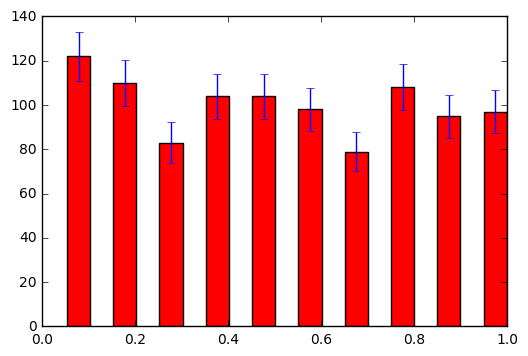

In [20]:
import numpy as np
import pylab as plt

data       = np.array(np.random.rand(1000))
y,binEdges = np.histogram(data,bins=10)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)
width      = 0.05
plt.bar(bincenters, y, width=width, color='r', yerr=menStd)
plt.show()